In [82]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

%matplotlib inline

In [10]:
pd.set_option('display.max_columns', None)

In [31]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [11]:
df = pd.read_csv('./data/epl2020.csv')

In [12]:
df.head()

,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,teamId,ppda_cal,allowed_ppda,matchtime,tot_points,round,tot_goal,tot_con,Referee.x,HS.x,HST.x,HF.x,HC.x,HY.x,HR.x,AS.x,AST.x,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,2.3863,w,2019-08-09 20:00:00,1,0,0,3,1.392153,Liverpool,5.942857,21.454545,20,3,1,4,1,M Oliver,15,7,9,11,0,0,12,5,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,0.4405,l,2019-08-09 20:00:00,0,0,1,0,-1.392153,Norwich,21.454545,5.942857,20,0,1,1,4,M Oliver,15,7,9,11,0,0,12,5,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,2.6312,w,2019-08-10 12:30:00,1,0,0,3,1.222340,Man City,6.935484,16.400000,12,3,1,5,0,M Dean,5,3,6,1,2,0,14,9,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,0.2522,l,2019-08-10 12:30:00,0,0,1,0,-1.222340,West Ham,16.400000,6.935484,12,0,1,0,5,M Dean,5,3,6,1,2,0,14,9,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,1.0172,d,2019-08-10 15:00:00,0,1,0,1,-0.257650,Bournemouth,13.600000,9.133333,15,1,1,1,1,K Friend,13,3,10,3,2,0,8,3,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


In [9]:
df.columns

Index(['Unnamed: 0', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'teamId', 'ppda_cal', 'allowed_ppda',
       'matchtime', 'tot_points', 'round', 'tot_goal', 'tot_con', 'Referee.x',
       'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x',
       'AF.x', 'AC.x', 'AY.x', 'AR.x', 'B365H.x', 'B365D.x', 'B365A.x',
       'HtrgPerc', 'AtrgPerc', 'matchDay'],
      dtype='object')

 # Getting names 

In [20]:
teams = df.teamId.unique()

In [29]:
#giving colors to each team


t_color = { 'Liverpool':'#c8102e', 'Norwich':'#fff200', 'Man City':'#6cabdd', 'West Ham':'#7a263a', 'Bournemouth':'#da291c',
       'Brighton':'#0057b8', 'Burnley':'#6c1d45', 'Crystal Palace':'#1b458f', 'Everton':'#003399',
       'Sheffield United':'#ee2737', 'Southampton':'#d71920', 'Watford':'#fbee23', 'Aston Villa':'#95bfe5',
       'Tottenham':'#132257', 'Arsenal':'#ef0107', 'Leicester':'#003090', 'Newcastle United':'#241f20', 'Wolves':'#fdb913',
       'Chelsea':'#034694', 'Man Utd':'#da291c'}

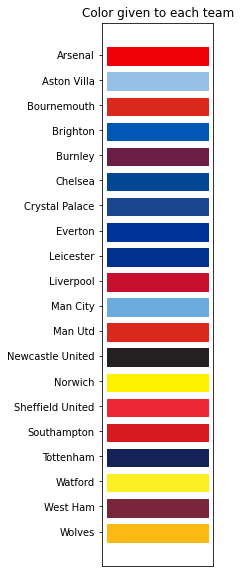

In [30]:
#create a figure

fig = plt.figure(figsize=(2,10))
ax = fig.add_subplot(111, facecolor='white')


y_val= 0
for team in sorted(teams, reverse=True):
    ax.fill_between([0,1], y_val+0.1, y_val+0.8, color=t_color[team])
    y_val+=1
    
ax.set_xticks([])

ax.set_yticks(np.arange(0.5, 20, 1))
ax.set_yticklabels(sorted(teams, reverse=True))
ax.set_title('Color given to each team')

plt.show()


## Getting the expected points

In [33]:
real_pts = {}
expect_pts = {}

for team in teams:
    real_pts[team] = df[df['teamId'] == team].pts.sum()
    expect_pts[team] = df[df['teamId'] == team].xpts.sum()
    
    
# Sort by points difference

pts_diff = {team:real_pts[team] - expect_pts[team] for team in teams}
sort_teams = sorted(pts_diff.keys(), key=pts_diff.get)


## Plotting difference in points

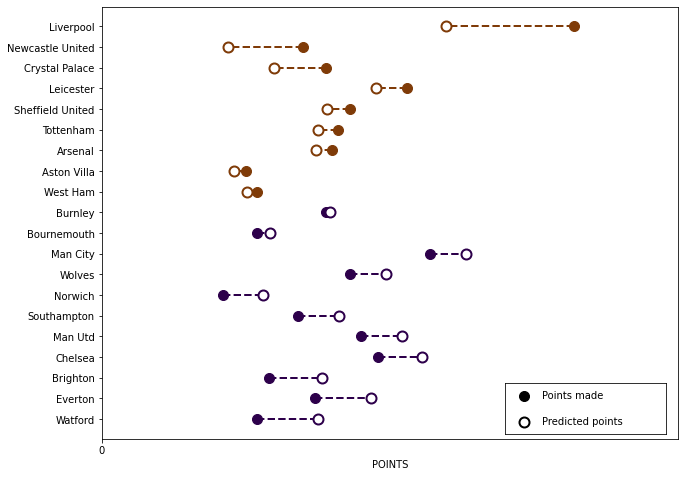

In [45]:
#figure

fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])

#colors

colors= plt.get_cmap('PuOr', 2)

#data points to connect with a line

yval = 0
for team in sort_teams:
    if real_pts[team] > expect_pts[team]:
        fill_color=colors(0)
    else:
        fill_color=colors(1)
    ax.plot([real_pts[team], expect_pts[team]],[yval, yval], linestyle='--', linewidth=2, color=fill_color)
    ax.plot(real_pts[team], yval, 'o', color=fill_color, markersize=10)
    ax.plot(expect_pts[team], yval, 'o', color='white', markeredgecolor=fill_color, markeredgewidth=2, markersize=10)
    yval +=1
    
ax.grid(color='white', linewidth=2)


#labels for points

ax.set_xticks(np.arange(0,10,10))

#team label

ax.set_yticks(np.arange(0, len(sort_teams), 1))
ax.set_yticklabels(sort_teams)

#limits


ax.set_xlim(0, 100)


#labels


ax.set_xlabel('POINTS')

leg=fig.add_axes([0.7, 0.01, 0.28, 0.12])
leg.plot([0], [1], 'o', color='black', markersize=10)
leg.text(0.3, 1, 'Points made', ha='left', va='center')
leg.plot([0],[0], 'o', color='white', markeredgecolor='black', markeredgewidth=2, markersize=10)
leg.text(0.3, 0, 'Predicted points', ha='left', va='center')
leg.set_xticks([])
leg.set_yticks([])
leg.set_xlim(-0.3, 2.3)
leg.set_ylim(-0.5, 1.5)

plt.show()

# Player analysis

In [54]:
data = pd.read_csv('./data/players.csv')
data.head()

,Unnamed: 0,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team
0,1,0,0,1,0,0.1,534,37,1,0,0.0,0.2,2019-08-31 14:00:00,24,Man City,0,0,0,0,4,0,0,0,4,0,1,0,0,0,45,False,0,Aaron Connolly,Brighton
1,2,0,0,1,0,0.3,534,43,1,0,2.2,1.0,2019-09-14 14:00:00,6,Burnley,0,0,0,0,5,0,14029,1,1,21,1,10589,13500,2911,45,True,0,Aaron Connolly,Brighton
2,3,0,0,1,0,4.8,534,58,0,0,2.5,2.0,2019-09-21 16:30:00,20,Newcastle United,0,0,0,0,6,0,22804,0,0,18,1,8090,11749,3659,45,False,0,Aaron Connolly,Brighton
3,4,0,0,2,0,0.6,534,63,1,0,0.1,0.2,2019-09-28 14:00:00,25,Chelsea,0,0,0,0,7,0,32699,0,2,0,1,8437,13439,5002,45,False,0,Aaron Connolly,Brighton
4,5,0,3,53,1,23.8,534,72,0,2,20.1,70.2,2019-10-05 11:30:00,79,Tottenham,0,0,0,0,8,0,35026,0,3,107,13,2156,5952,3796,45,True,0,Aaron Connolly,Brighton


In [59]:
player = pd.unique(data['full'])


#here we have  alist of all players in our dataframe

In [61]:
## Assists and goals

assists = {}
goals = {}

for baller in players:
    mins= data[data['full'] == baller].minutes.sum()/90.
    if mins >= 10:
        assists[player] = data[data['full'] == baller].assists.sum()/mins
        goals[player] = data[data['full'] == baller].goals_scored.sum()/mins

In [62]:
goaler = sorted(goals.keys(), key=goals.get, reverse=True)[:20]

passer = sorted(assists.keys(), key=assists.get, reverse=True)[:20]

In [66]:
goals

{}

## Best scorers

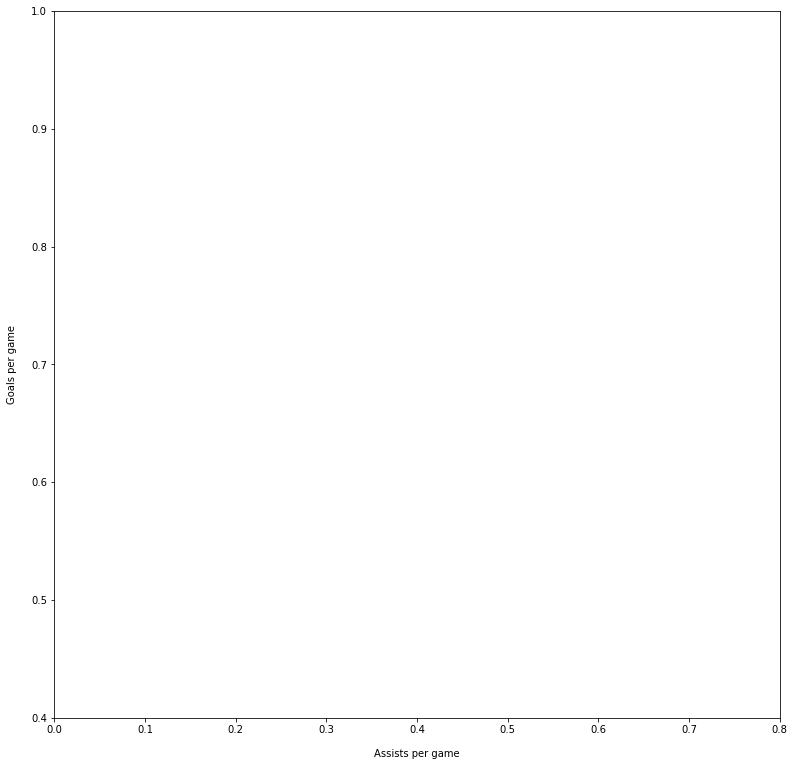

In [67]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

#player

for x in goaler:
    team = data[data['full'] == x].team.iloc[0]
    ax.plot(assists[player], goaler[player], 'o', color=team_colors[team],zorder=3)
    text = ax.text(assists[player] + 0.01, goaler[player],size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    
#grid

ax.grid(color='white', linewidth=2)

#labels
ax.set_xlabel('Assists per game', labelpad=14)
ax.set_ylabel('Goals per game', labelpad=14)


ax.set_xlim(0, 0.8)
ax.set_ylim(0.4, 1)

plt.show()

## Assists

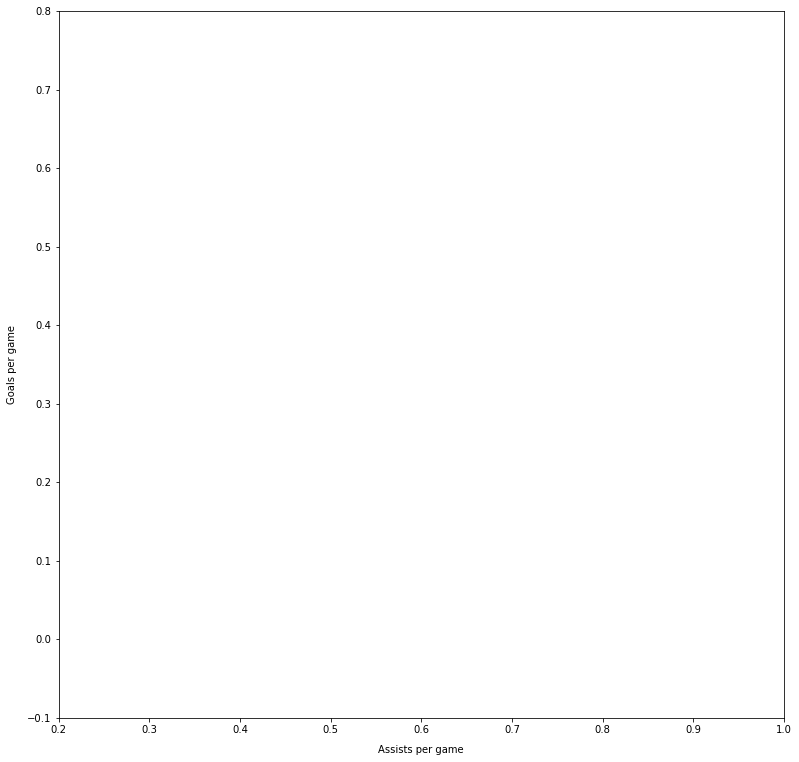

In [79]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

for player in assists:
    team = data[data['full'] == player].team.iloc[0]
    ax.plot(assists[player], goaler[player], 'o', color=t_color[team], zorder=3)
    text = ax.text(assists[player] +0.01, goaler[player], player[player], size=14, va='center', ha='left',zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    
#grid

ax.grid(color='white', linewidth=2)

#labels

ax.set_xlabel('Assists per game', labelpad=10)
ax.set_ylabel('Goals per game', labelpad=10)

#limit
ax.set_xlim(0.2, 1)
ax.set_ylim(-0.1, 0.8)

plt.show()

## Yellow teams per team

In [72]:
yellow = {}
red = {}

for team in teams:
    yellow[team] = data[data['team'] == team].yellow_cards.sum()
    red[team] = data[data['team'] == team].red_cards.sum()

In [103]:
most_yellow = sorted(yellow.keys(), key=yellow.get)

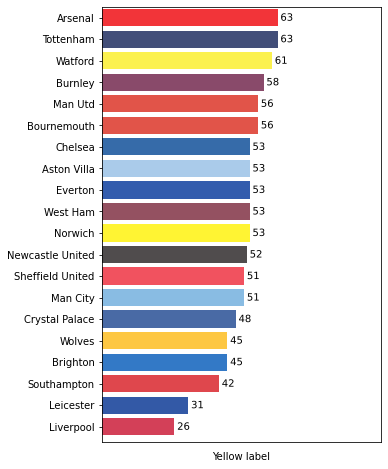

In [97]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(111)

y_val = 0

for team in most_yellow:
    ax.barh(y_val, yellow[team], color=t_color[team], alpha=0.8)
    text = ax.text(yellow[team]+1, y_val, yellow[team], ha='left', va='center')
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    y_val+=1
    
#erase ticks  
ax.set_xticks([])
#y-ticks to team names
ax.set_yticks(np.arange(0, 21, 1))
ax.set_yticklabels(most_yellow)

#labels

ax.set_xlabel('Yellow label', labelpad=10)

#limits
ax.set_xlim(0,100)
ax.set_ylim(-0.7,19.5)

plt.show()

# Measuring creativity

In [98]:
creativity = {}

for team in teams:
    creativity[team] = data[data['team'] == team].creativity.sum()

In [106]:
most_creative = sorted(creativity.keys(), key=creativity.get)

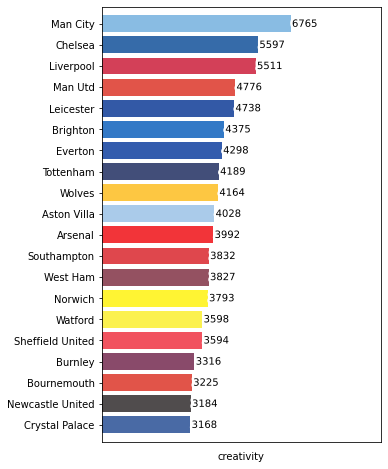

In [108]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)

#making horizontal bar
y_val = 0

for team in most_creative:
    ax.barh(y_val, creativity[team], color=t_color[team], alpha=0.8)
    text = ax.text(creativity[team]+50, y_val, '%i'%creativity[team], ha='left', va='center')
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    y_val+=1
    
ax.set_xticks([])#ticks out

#y-ticks to team names
ax.set_yticks(np.arange(0,21,1))
ax.set_yticklabels(most_creative)

ax.set_xlabel('creativity', labelpad=10)


ax.set_xlim(0, 10000)
ax.set_ylim(-0.8, 19.8)
plt.show()
    

## Best saves

In [115]:
saves = {}
clean_sheet = {}

for player in players:
    mins=data[data['full'] == player].minutes.sum()/90.
    if mins >=10:
        saves[player] = data[data['full'] == player].saves.sum()/mins
        clean_sheet[player] = data[data['full'] == player].clean_sheet.sum()

In [116]:
top_goalie = sorted(saves.keys(), key=saves.get, reverse=True)

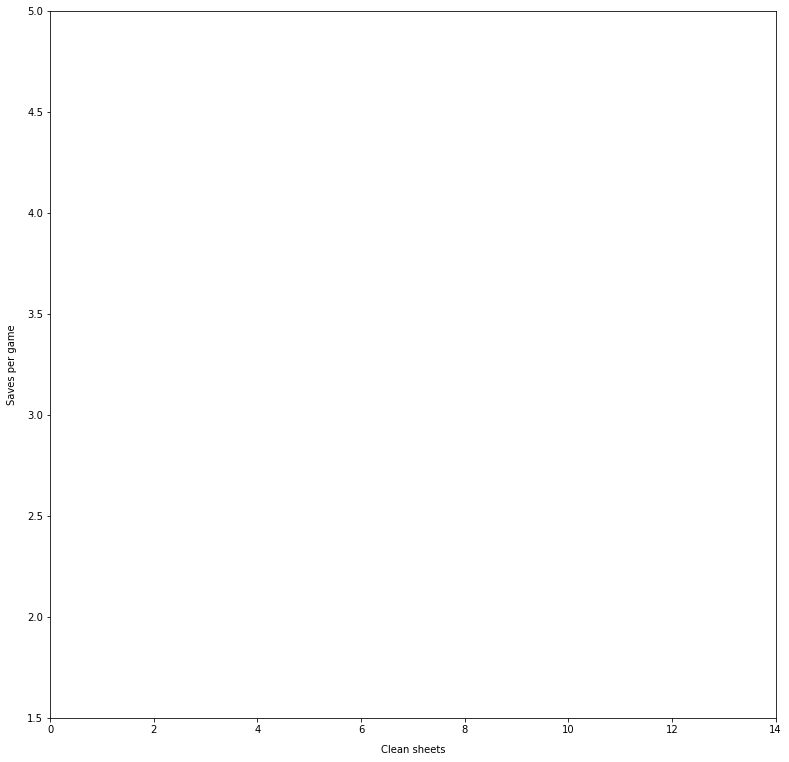

In [118]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)

for keeper in top_goalie:
    team = data[data['full'] == keeper].team.iloc[0]
    ax.plot(clean_sheet[keeper], saves[keeper], 'o', color=t_color[team], zorder=3)
    text = ax.text(clean_sheet[keeper]+0.2, saves[keeper], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    

ax.grid(color='white', linewidth=2)


ax.set_xlabel('Clean sheets', labelpad=10)
ax.set_ylabel('Saves per game', labelpad=10)

ax.set_xlim(0, 14)
ax.set_ylim(1.5, 5)

plt.show()